# **Universidad Autónoma de Occidente**

## **Aprendizaje Automático**

### **Proyecto Final:**

### Entregado por:
- Jose Vicente Alzate Guerrero (jose_vicente.alzate@uao.edu.co)
- Roberto Carlos Segundo Tierno (roberto.tierno@uao.edu.co)
- Soren Fabricius Acevedo Azuero (soren.acevedo@uao.edu.co)

## **Introducción**

### **Dataset**

**Nombre**: Heart Attack Dataset

**Descripción**: Los conjuntos de datos de infarto se recopilaron en el hospital Zheen de Erbil (Irak) entre enero y mayo de 2019. Los atributos de  este conjunto de datos son: edad, sexo, frecuencia cardíaca, presión arterial sistólica, presión arterial diastólica, glucemia, CK-MB y troponina, con valores negativos o positivos. Según la información proporcionada, el conjunto de datos médicos clasifica si se trata de un infarto o no. La columna de sexo está normalizada: para hombre se establece en 1 y para mujer en 0

. La columna de glucosa se establece en 1 si es > 120; en caso contrario, en 0. En cuanto a los valores positivos, se establece en 1 y negativos en 0.

**Fuente**: https://www.kaggle.com/datasets/fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid/data

#### 📚 **Dependencias y carga de datos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [ ]:
df = pd.read_csv('data/Medicaldataset.csv')

#### 🔎 **Análisis descriptivo**

In [ ]:
"""
Data frame description functions for the project.
"""

import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

def describe_dataframe(df, sample_rows=5, figsize=(10, 6)):
    """
    Imprime una descripción detallada y visualmente atractiva de un DataFrame
    con emojis relacionados a cada sección.

    Parameters:
    -----------
    df : pandas.DataFrame
        El DataFrame a describir
    sample_rows : int, default=5
        Número de filas a mostrar en la muestra
    figsize : tuple, default=(10, 6)
        Tamaño de la figura para las visualizaciones

    Returns:
    --------
    None
        La función imprime la información directamente
    """
    # Verificar que df es un DataFrame
    if not isinstance(df, pd.DataFrame):
        print("❌ Error: El objeto proporcionado no es un DataFrame de pandas")
        return

    print("\n" + "="*80)
    print("📊 DESCRIPCIÓN COMPLETA DEL DATASET 📊")
    print("="*80)

    # 1. Información general sobre el DataFrame
    print("\n🔍 INFORMACIÓN GENERAL")
    print("-"*50)
    print(f"📏 Dimensiones (filas, columnas): {df.shape}")
    print(f"🏷️ Número de columnas: {len(df.columns)}")
    print(f"📝 Número de entradas: {df.size}")
    print(f"💾 Memoria utilizada: {df.memory_usage().sum() / 1024**2:.2f} MB")

    # 2. Primeras filas del DataFrame
    print("\n👀 VISTA PREVIA DE DATOS")
    print("-"*50)
    display(df.head(sample_rows))

    # 3. Información sobre tipos de datos y valores nulos
    print("\n📋 INFORMACIÓN DE COLUMNAS")
    print("-"*50)
    buffer = []
    for col in df.columns:
        missing = df[col].isna().sum()
        missing_pct = missing / len(df) * 100
        dtype = str(df[col].dtype)
        unique = df[col].nunique() if df[col].dtype != 'object' or df[col].nunique() < 1000 else "muchos"

        emoji = "🔢" if np.issubdtype(df[col].dtype, np.number) else "📝"
        emoji = "📅" if "date" in str(df[col].dtype).lower() else emoji
        emoji = "⏱️" if "time" in str(df[col].dtype).lower() else emoji
        emoji = "✓" if "bool" in str(df[col].dtype).lower() else emoji

        buffer.append(f"{emoji} {col}: {dtype}, {missing} valores nulos ({missing_pct:.2f}%), {unique} valores únicos")

    for line in buffer:
        print(line)

    # 4. Información detallada usando info()
    print("\n📘 INFORMACIÓN DETALLADA")
    print("-"*50)
    df.info(verbose=True)

    # 5. Estadísticas descriptivas
    print("\n📈 ESTADÍSTICAS DESCRIPTIVAS")
    print("-"*50)
    if df.select_dtypes(include=[np.number]).columns.empty:
        print("⚠️ No hay columnas numéricas para mostrar estadísticas descriptivas.")
    else:
        display(df.describe().transpose())

    # 6. Valores nulos por columna
    print("\n❓ ANÁLISIS DE VALORES NULOS")
    print("-"*50)
    missing_values = df.isna().sum()
    missing_values_pct = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({
        '❓ Valores nulos': missing_values,
        '📊 % del total': missing_values_pct.round(2)
    }).sort_values('❓ Valores nulos', ascending=False)

    if missing_values.sum() > 0:
        display(missing_df[missing_df['❓ Valores nulos'] > 0])

        # Visualización de valores nulos
        plt.figure(figsize=figsize)
        sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap='viridis')
        plt.title('Mapa de valores nulos')
        plt.tight_layout()
        plt.show()
    else:
        print("✅ No hay valores nulos en el dataset.")

    # 7. Tipos de datos y su distribución
    print("\n🧮 TIPOS DE DATOS")
    print("-"*50)
    dtypes_count = df.dtypes.value_counts().reset_index()
    dtypes_count.columns = ['Tipo de dato', 'Cantidad']
    display(dtypes_count)

    # 8. Correlación entre variables numéricas
    numeric_df = df.select_dtypes(include=[np.number])
    if len(numeric_df.columns) > 1:
        print("\n🔄 MATRIZ DE CORRELACIÓN")
        print("-"*50)
        plt.figure(figsize=figsize)
        corr = numeric_df.corr()
        mask = np.triu(np.ones_like(corr, dtype=bool))
        sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f",
                   linewidths=0.5, vmin=-1, vmax=1, center=0)
        plt.title('Correlación entre variables numéricas')
        plt.tight_layout()
        plt.show()

    print("\n" + "="*80)
    print("🎉 FIN DE LA DESCRIPCIÓN DEL DATASET 🎉")
    print("="*80 + "\n")




📊 DESCRIPCIÓN COMPLETA DEL DATASET 📊

🔍 INFORMACIÓN GENERAL
--------------------------------------------------
📏 Dimensiones (filas, columnas): (1319, 9)
🏷️ Número de columnas: 9
📝 Número de entradas: 11871
💾 Memoria utilizada: 0.09 MB

👀 VISTA PREVIA DE DATOS
--------------------------------------------------


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative



📋 INFORMACIÓN DE COLUMNAS
--------------------------------------------------
🔢 Age: int64, 0 valores nulos (0.00%), 75 valores únicos
🔢 Gender: int64, 0 valores nulos (0.00%), 2 valores únicos
🔢 Heart rate: int64, 0 valores nulos (0.00%), 79 valores únicos
🔢 Systolic blood pressure: int64, 0 valores nulos (0.00%), 116 valores únicos
🔢 Diastolic blood pressure: int64, 0 valores nulos (0.00%), 73 valores únicos
🔢 Blood sugar: float64, 0 valores nulos (0.00%), 244 valores únicos
🔢 CK-MB: float64, 0 valores nulos (0.00%), 700 valores únicos
🔢 Troponin: float64, 0 valores nulos (0.00%), 352 valores únicos
📝 Result: object, 0 valores nulos (0.00%), 2 valores únicos

📘 INFORMACIÓN DETALLADA
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non

,count,mean,std,min,25%,50%,75%,max
Age,1319.0,56.191812,13.647315,14.000,47.000,58.000,65.0000,103.0
Gender,1319.0,0.659591,0.474027,0.000,0.000,1.000,1.0000,1.0
Heart rate,1319.0,78.336619,51.630270,20.000,64.000,74.000,85.0000,1111.0
Systolic blood pressure,1319.0,127.170584,26.122720,42.000,110.000,124.000,143.0000,223.0
Diastolic blood pressure,1319.0,72.269143,14.033924,38.000,62.000,72.000,81.0000,154.0
Blood sugar,1319.0,146.634344,74.923045,35.000,98.000,116.000,169.5000,541.0
CK-MB,1319.0,15.274306,46.327083,0.321,1.655,2.850,5.8050,300.0
Troponin,1319.0,0.360942,1.154568,0.001,0.006,0.014,0.0855,10.3



❓ ANÁLISIS DE VALORES NULOS
--------------------------------------------------
✅ No hay valores nulos en el dataset.

🧮 TIPOS DE DATOS
--------------------------------------------------


,Tipo de dato,Cantidad
0,int64,5
1,float64,3
2,object,1



🔄 MATRIZ DE CORRELACIÓN
--------------------------------------------------


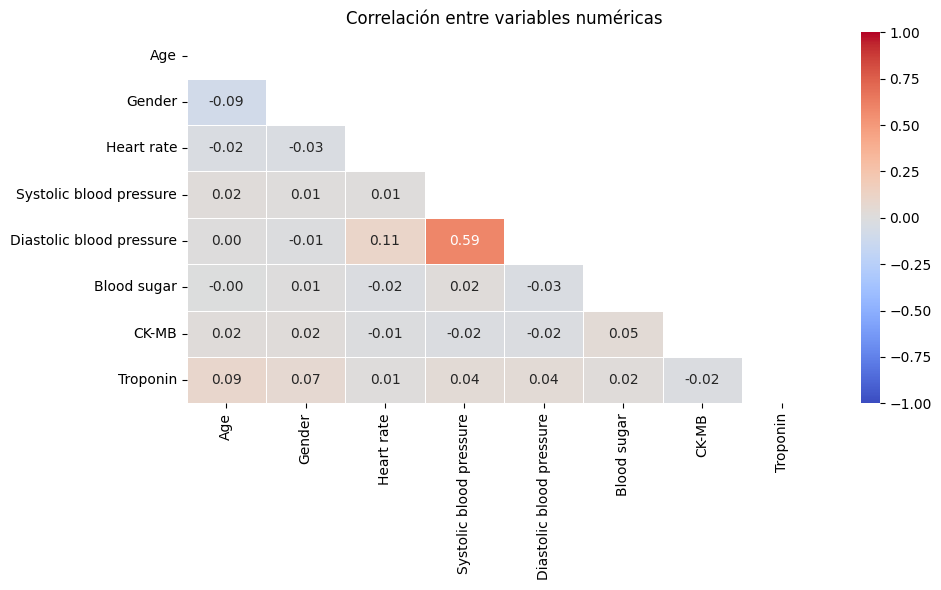


🎉 FIN DE LA DESCRIPCIÓN DEL DATASET 🎉



In [ ]:
describe_dataframe(df)

### Limpieza de datos

In [ ]:
df.duplicated().sum()

np.int64(0)

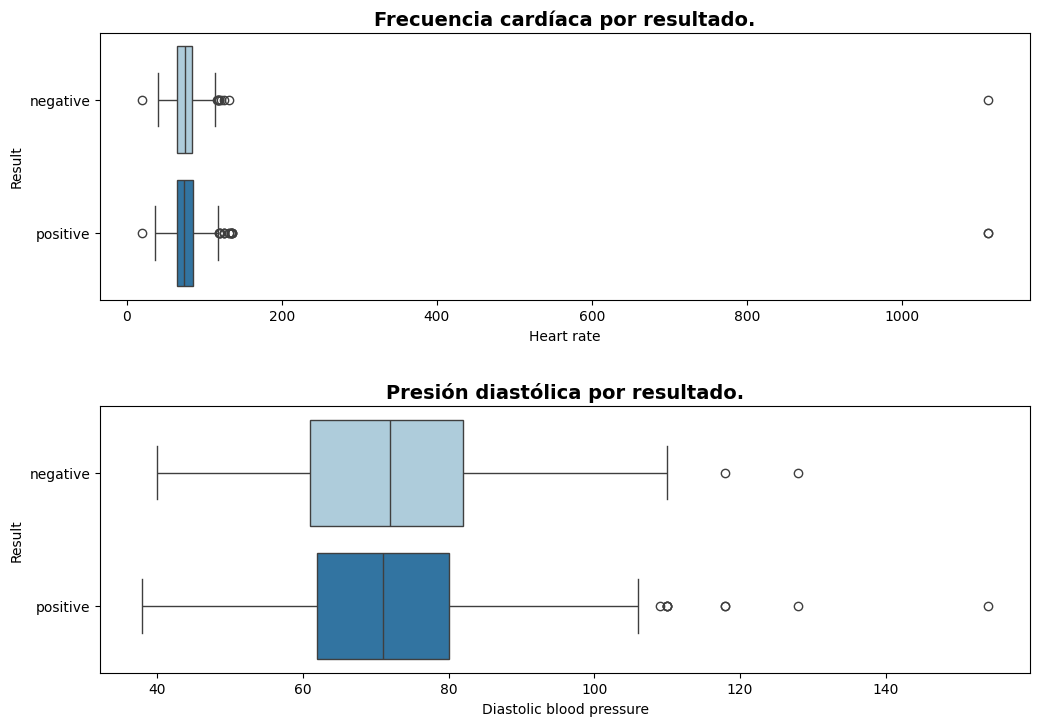

In [ ]:
# Setup figura
fig = plt.figure(figsize=(12, 18))
gs = gridspec.GridSpec(4, 1, figure=fig, wspace=0.4, hspace=0.4)

# Variables y títulos
categorias = ['Heart rate', 'Diastolic blood pressure']
titulos = [
    'Frecuencia cardíaca por resultado.',
    'Presión diastólica por resultado.',
]

# Bucle para generar los gráficos
for idx, (categoria, titulo) in enumerate(zip(categorias, titulos)):
    ax = fig.add_subplot(gs[idx])
    sns.boxplot(data=df, x=categoria, y='Result', ax=ax, orient='h', hue='Result', palette="Paired")
    ax.set_title(titulo, fontsize=14, weight='bold')

# Mostrar
plt.show()

In [ ]:
df['Heart rate'].nlargest(5)
df = df[df['Heart rate'] != 1111]

In [ ]:
df['Diastolic blood pressure'].nlargest(5)
df = df[df['Diastolic blood pressure'] != 154]

In [ ]:
df.shape

(1315, 9)

#### **Visualización de datos**

Para la visualización de datos, se mostraran gráficas de:
- Composición
- Distribución
- Comparación

In [ ]:
def pie_label(pct, allvals):
    """
    Función para los gráficos de torta,
    está función muestra tanto el porcentaje
    cómo el porcentaje
    """
    if pct < 3:
        return ''
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

categorias = {
    'Composición por Sexo': df['Gender'].value_counts(),
    'Composición por Resultado': df['Result'].value_counts(),
}

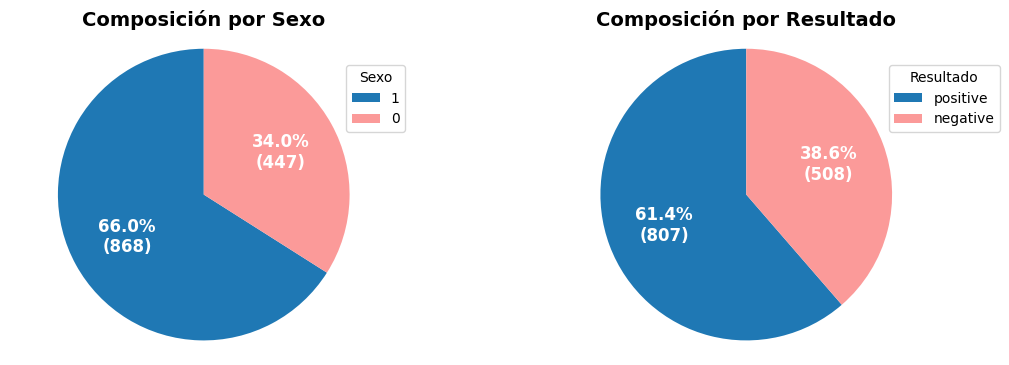

In [ ]:
fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(2, 2, figure=fig, wspace=0.4, hspace=0.4)
colors = plt.cm.Paired.colors
colors = [colors[1], colors[4]]

for idx, (titulo, composicion) in enumerate(categorias.items()):
    ax = fig.add_subplot(gs[idx])
    wedges, texts, autotexts = ax.pie(
        composicion,
        labels=composicion.index,
        autopct=lambda pct: pie_label(pct, composicion),
        textprops=dict(color="white", fontsize=12, weight='bold'),
        colors=colors,
        startangle=90,
        radius=0.9
    )
    ax.set_title(titulo, fontsize=14, weight='bold')
    ax.legend(
        wedges,
        composicion.index,
        title=titulo.split(' ')[-1],
        loc="center left",
        bbox_to_anchor=(0.85, 0.8)
    )
    ax.axis('equal')  # Círculo perfecto

# Mostrar
plt.show()

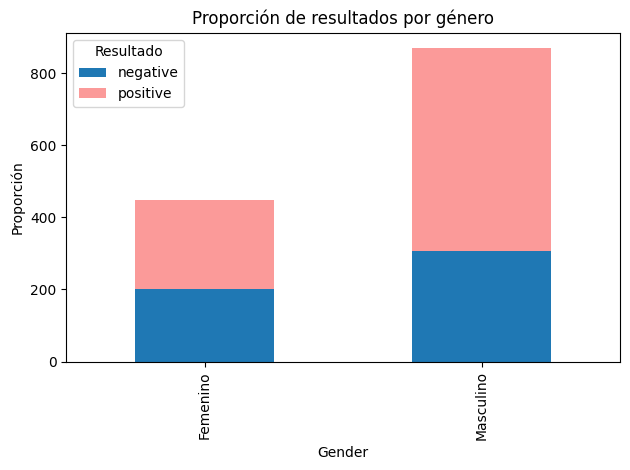

In [ ]:
# Visualización comparación
counts = pd.crosstab(df['Gender'], df['Result'])
colors = plt.cm.Paired.colors
# Graficar
ax = counts.plot(kind='bar', stacked=True, color=[colors[1], colors[4]])

# Obtener los ticks actuales
ax.set_xticks(range(len(counts.index)))  # Asegura que hay tantos ticks como etiquetas
ax.set_xticklabels(['Femenino', 'Masculino'])  # Aquí colocas los nombres deseados

ax.set_ylabel('Proporción')
ax.set_title('Proporción de resultados por género')
plt.legend(title='Resultado')
plt.tight_layout()
plt.show()

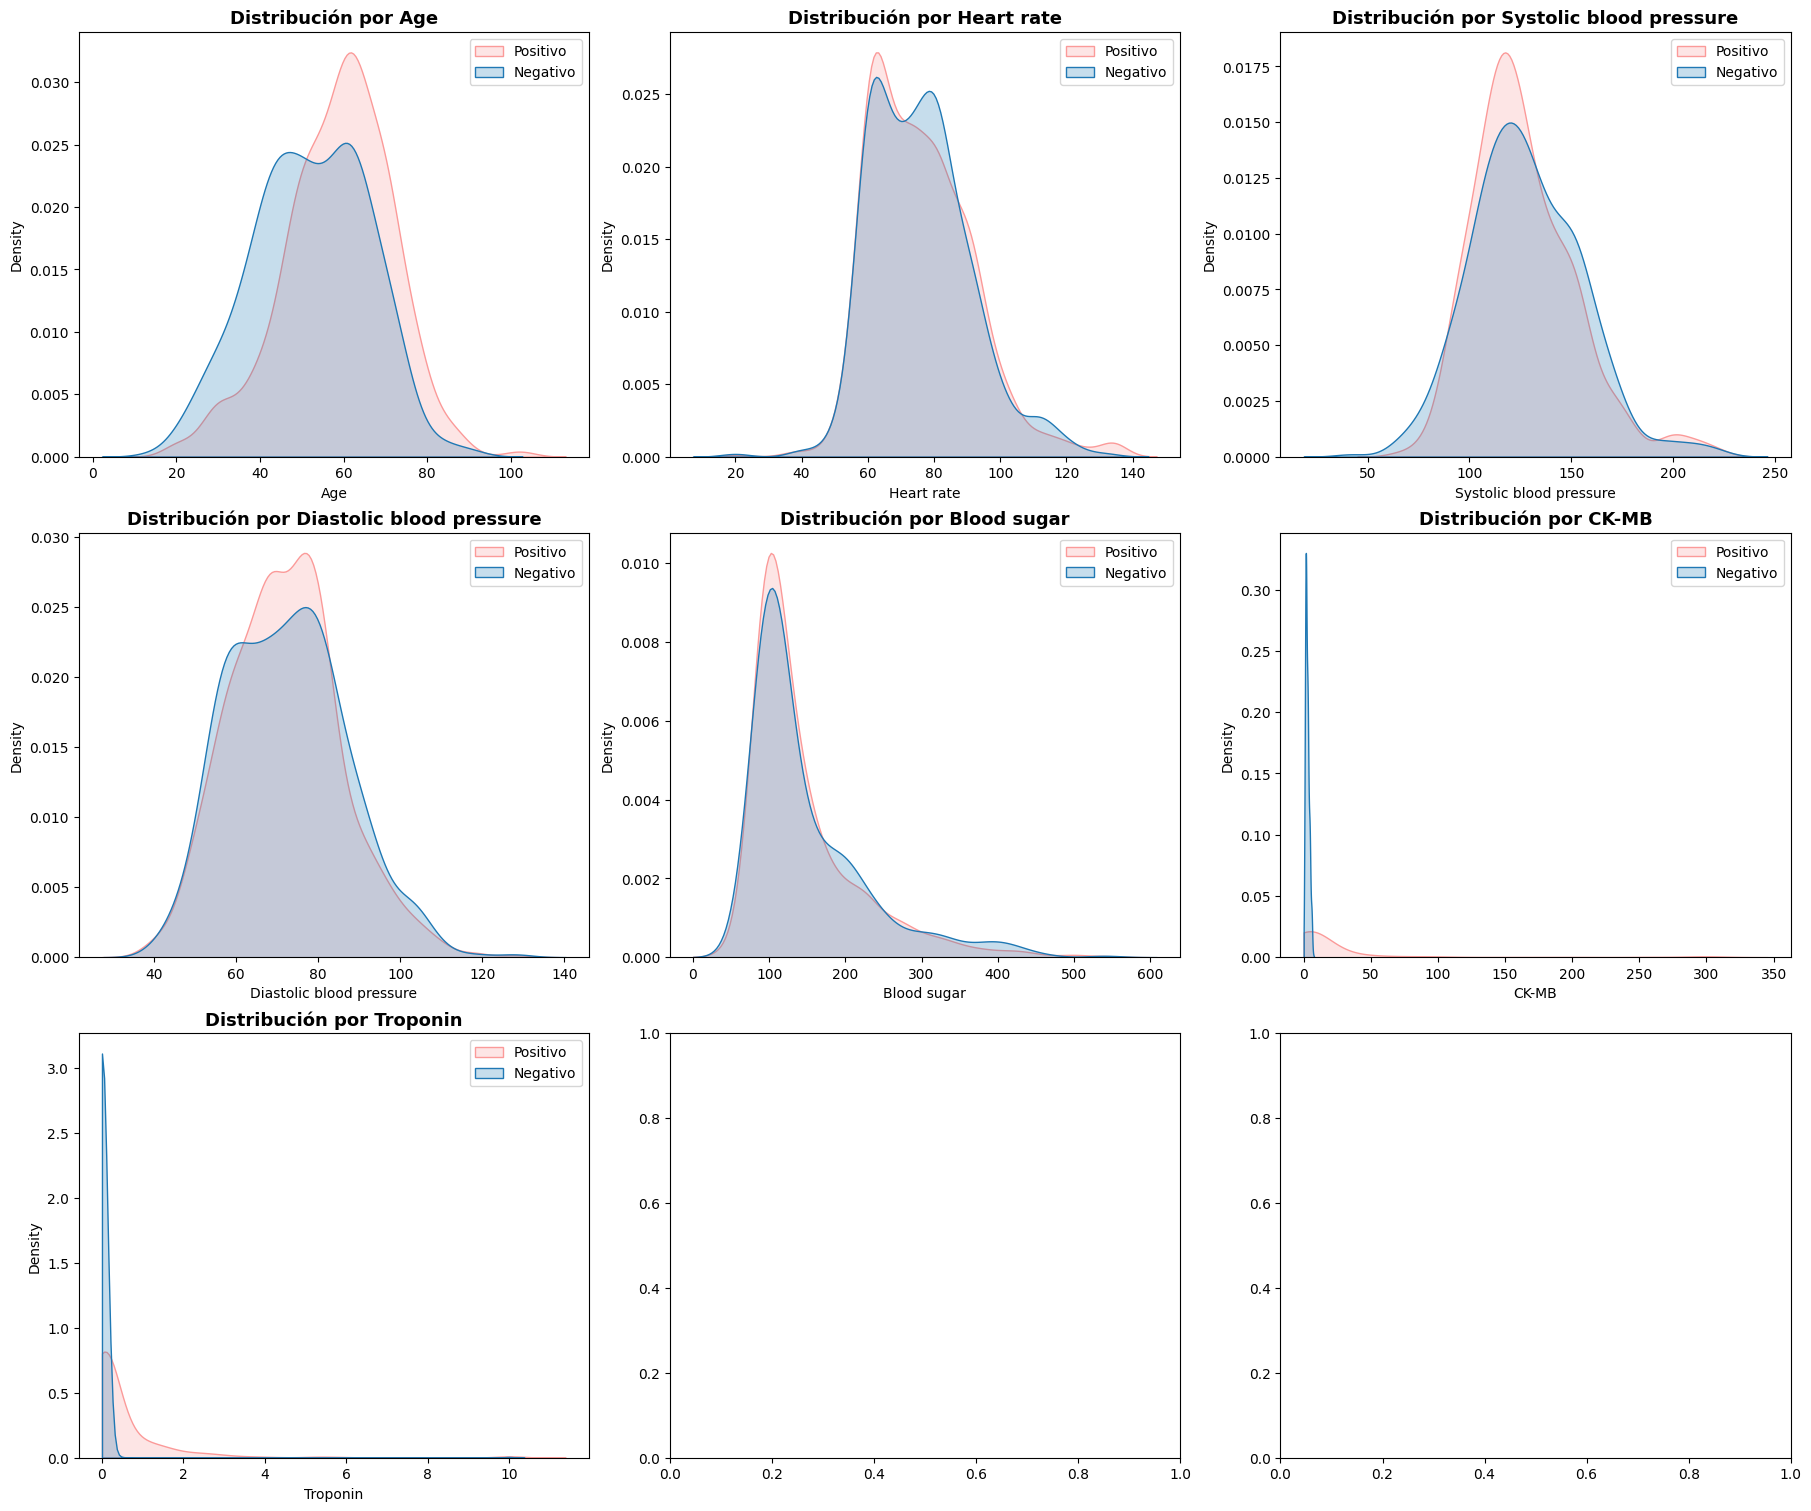

In [ ]:
# Visualizaciones de distribución y comparación por resultado
colors = plt.cm.Paired.colors
columns = ['Age', 'Heart rate', 'Systolic blood pressure',
           'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']
num_plots = len(columns)
rows = (num_plots + 2) // 3  # 3 plots por fila

# Crear la figura con tamaño adecuado
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows), constrained_layout=True)
axes = axes.flatten()

# Graficar cada columna
for i, col in enumerate(columns):
    sns.kdeplot(data=df[df['Result'] == 'positive'], x=col, fill=True, label='Positivo', color=colors[4], ax=axes[i], clip=(0, np.inf))
    sns.kdeplot(data=df[df['Result'] == 'negative'], x=col, fill=True, label='Negativo', color=colors[1], ax=axes[i], clip=(0, np.inf))
    axes[i].set_title(f'Distribución por {col}', fontsize=13, weight='bold')
    axes[i].legend()

plt.show()


### Análisis de correlación

In [ ]:
#Asignacion de variables numericas a las variables categoricas
resultado = {'negative':0,'positive':1}

df['Result'] = df['Result'].map(resultado)


🔄 MATRIZ DE CORRELACIÓN
--------------------------------------------------


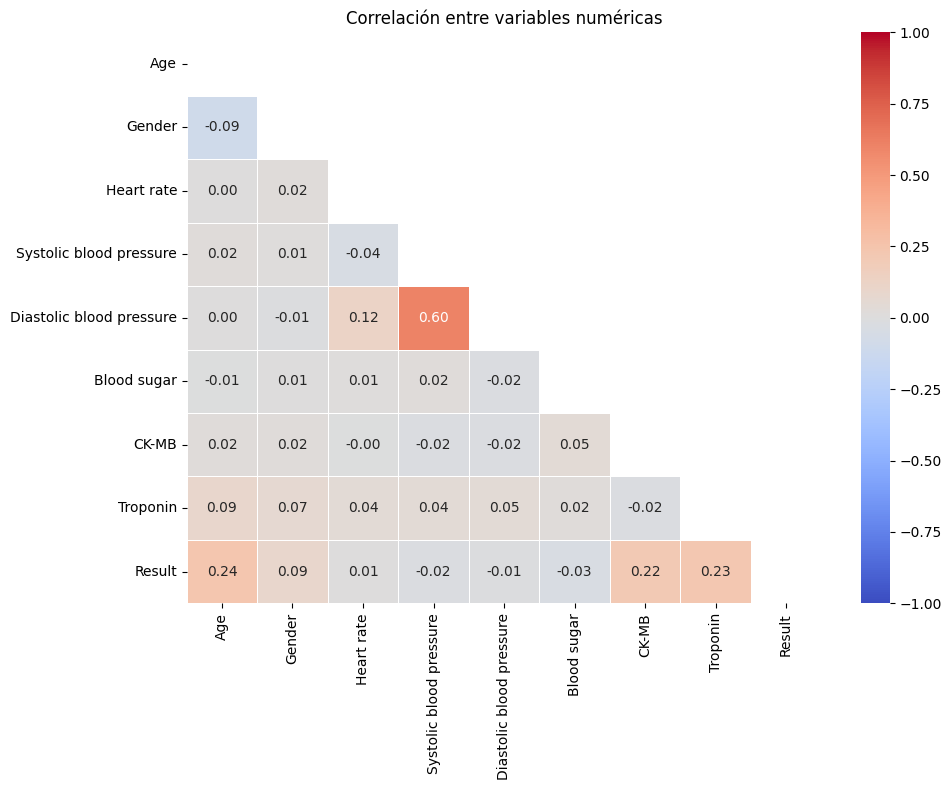

In [ ]:
print("\n🔄 MATRIZ DE CORRELACIÓN")
print("-"*50)
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f",
           linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title('Correlación entre variables numéricas')
plt.tight_layout()
plt.show()